In [60]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [61]:
train =pd.read_csv('train.csv')

In [62]:
test =pd.read_csv('test.csv')

In [63]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Store_Returns'] = np.nan

In [64]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,source,Item_Store_Returns
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store,test,NaN
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,test,NaN
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,test,NaN
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store,test,NaN
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,test,NaN


In [65]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,source
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,train
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,train
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,train
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,train
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,train


In [66]:
df = pd.concat([train, test], ignore_index=True)

In [67]:
test.shape

(3532, 14)

In [68]:
df.shape

(8522, 14)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
 12  source               3532 non-null   object 
 13  Item_Store_Returns   0 non-null      float64
dtypes: float64(4), int64(1), object(9)
memory usage: 386.4+ KB


In [70]:
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,source
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,train
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,train
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,train
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,train
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,train


In [71]:
df.shape

(8522, 14)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              8522 non-null   object 
 1   Store_ID             8522 non-null   object 
 2   Item_Store_ID        8522 non-null   object 
 3   Item_Weight          7059 non-null   float64
 4   Item_Sugar_Content   8522 non-null   object 
 5   Item_Visibility      8522 non-null   float64
 6   Item_Type            8522 non-null   object 
 7   Item_Price           8522 non-null   float64
 8   Store_Start_Year     8522 non-null   int64  
 9   Store_Size           6113 non-null   object 
 10  Store_Location_Type  8522 non-null   object 
 11  Store_Type           8522 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
 13  source               8522 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 932.2+ KB


In [73]:
df.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,7059.000000,8522.000000,8522.000000,8522.000000,4990.000000
mean,12.857115,0.066134,352.471687,2004.831847,6103.520164
std,4.643572,0.051600,155.693760,8.372251,4447.333835
min,4.555000,0.000000,78.230000,1992.000000,83.230000
25%,8.772500,0.026988,234.542500,1994.000000,2757.660000
50%,12.600000,0.053935,357.450000,2006.000000,5374.675000
75%,16.850000,0.094594,464.130000,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [74]:
df.describe(include='object')

,Item_ID,Store_ID,Item_Store_ID,Item_Sugar_Content,Item_Type,Store_Size,Store_Location_Type,Store_Type,source
count,8522,8522,8522,8522,8522,6113,8522,8522,8522
unique,1559,10,8522,3,16,3,3,4,2
top,FDW13,BABATUNJI027,DRA12_BABATUNJI010,Low Sugar,Fruits and Vegetables,Medium,Cluster 3,Supermarket Type1,train
freq,10,935,1,5200,1232,2793,3349,5577,4990


In [75]:
df.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight            1463
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             2409
Store_Location_Type       0
Store_Type                0
Item_Store_Returns     3532
source                    0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
df.nunique()

Item_ID                1559
Store_ID                 10
Item_Store_ID          8522
Item_Weight             415
Item_Sugar_Content        3
Item_Visibility        7879
Item_Type                16
Item_Price             5418
Store_Start_Year          9
Store_Size                3
Store_Location_Type       3
Store_Type                4
Item_Store_Returns     2686
source                    2
dtype: int64

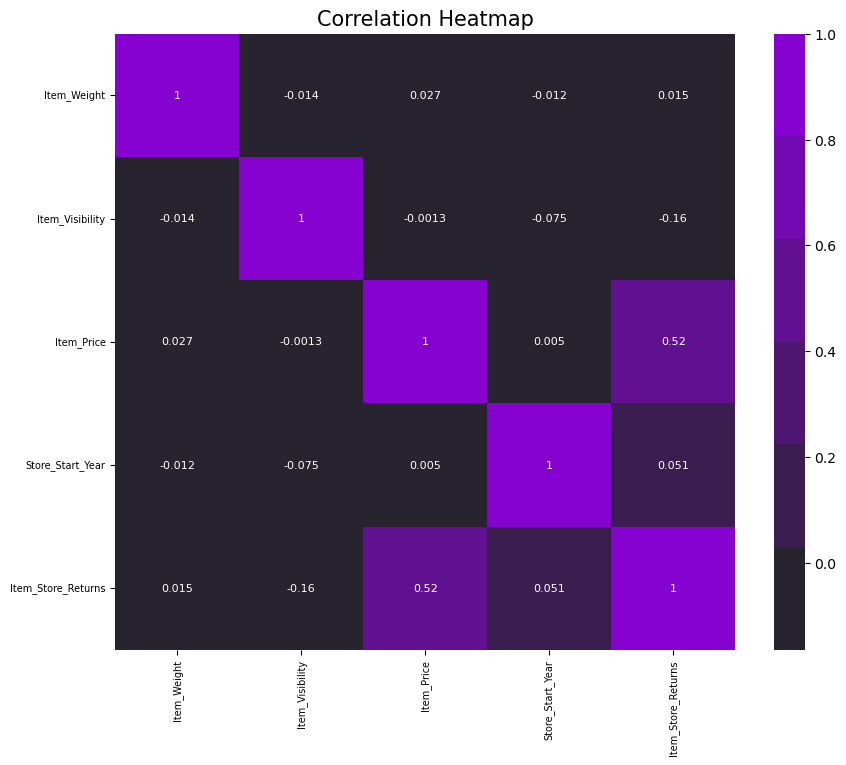

In [78]:
# For correlation heatmap, let's consider the numeric features only
correlation_matrix = df.corr()
colors_multi = sns.dark_palette("#8502d1", as_cmap=False)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 8})

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


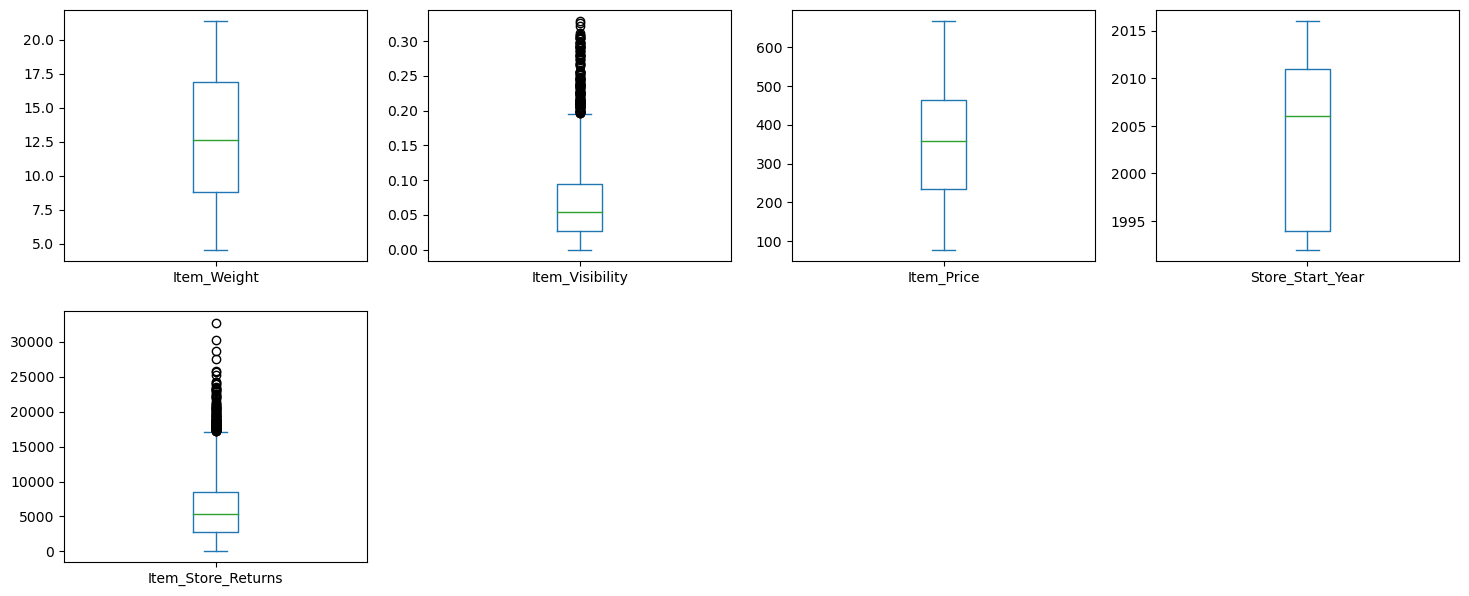

In [79]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) , layout = (4, 4))
plt.show()

In [80]:
# Data cleaning process

In [81]:
df.drop(['Item_ID','Store_ID'], axis=1, inplace=True)

In [82]:
df.columns

Index(['Item_Store_ID', 'Item_Weight', 'Item_Sugar_Content', 'Item_Visibility',
       'Item_Type', 'Item_Price', 'Store_Start_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Item_Store_Returns', 'source'],
      dtype='object')

In [83]:
# 3. Fill missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Item_Visibility'].fillna(df['Item_Visibility'].mean(), inplace=True)
df['Item_Price'].fillna(df['Item_Price'].mean(), inplace=True)


In [84]:
df['Store_Size'].fillna(df['Store_Size'].mode()[0], inplace=True)

In [85]:
# 2. Feature Engineering
df['Store_Age'] = 2025 - df['Store_Start_Year']
df['Visibility_Adjusted_Price'] = df['Item_Price'] / (df['Item_Visibility'] + 1e-5)
df['Store_Exposure'] = df['Item_Visibility'] * df['Store_Age']
df['Item_Price_per_Weight'] = df['Item_Price'] / df['Item_Weight']
df['Item_Weight_Category'] = pd.cut(df['Item_Weight'], bins=[0, 5, 10, 20, 100])

In [86]:
df['Item_Price_per_Weight'].fillna(df['Item_Price_per_Weight'].mean(), inplace=True)

In [87]:
df['Item_Weight_Category'].fillna(df['Item_Weight_Category'].mode()[0], inplace=True)

In [88]:
df['Store_Size'].isnull().sum()

0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Store_ID              8522 non-null   object  
 1   Item_Weight                8522 non-null   float64 
 2   Item_Sugar_Content         8522 non-null   object  
 3   Item_Visibility            8522 non-null   float64 
 4   Item_Type                  8522 non-null   object  
 5   Item_Price                 8522 non-null   float64 
 6   Store_Start_Year           8522 non-null   int64   
 7   Store_Size                 8522 non-null   object  
 8   Store_Location_Type        8522 non-null   object  
 9   Store_Type                 8522 non-null   object  
 10  Item_Store_Returns         4990 non-null   float64 
 11  source                     8522 non-null   object  
 12  Store_Age                  8522 non-null   int64   
 13  Visibility_Adjusted_Price  8522 n

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

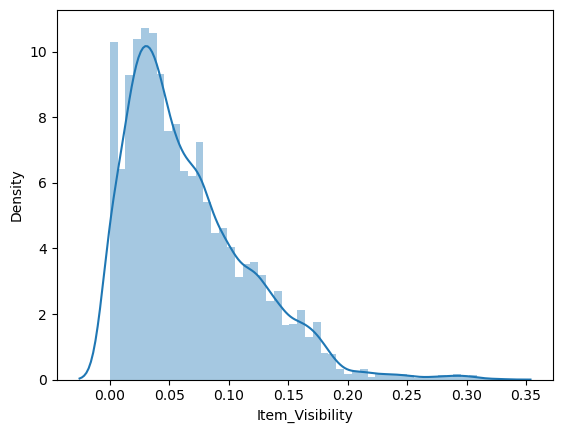

In [90]:
sns.distplot(df['Item_Visibility'])

In [91]:
df.shape

(8522, 17)

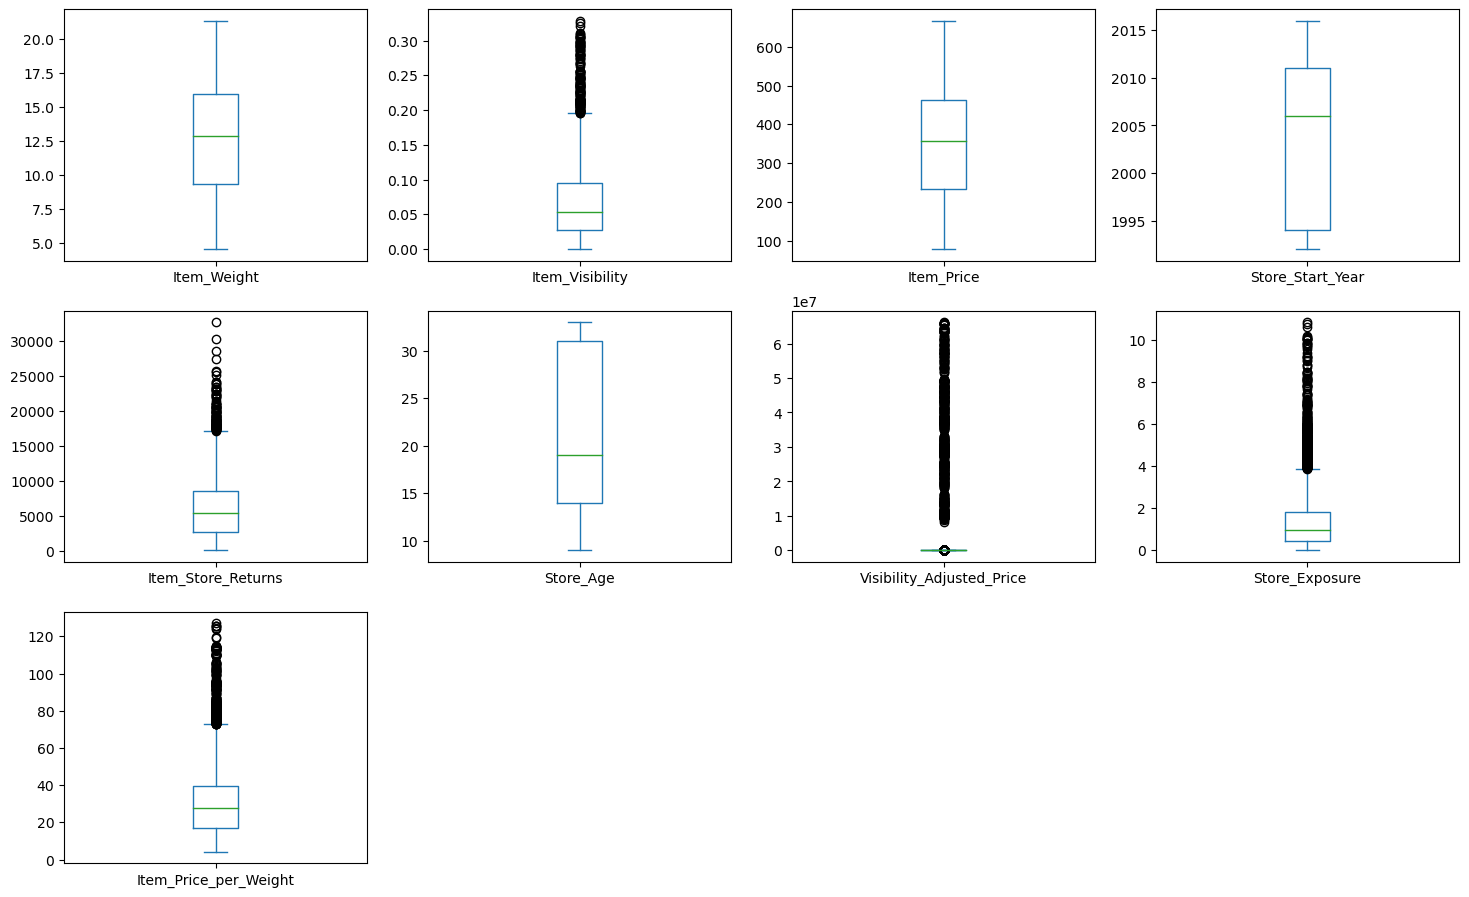

In [92]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) , layout = (4, 4))
plt.show()

In [93]:
df.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,source,Store_Age,Visibility_Adjusted_Price,Store_Exposure,Item_Price_per_Weight,Item_Weight_Category
0,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,train,20,5.216132e+03,1.370701,30.822414,"(10, 20]"
1,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,train,31,8.694383e+03,1.268267,30.671552,"(10, 20]"
2,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69,train,11,8.516903e+03,0.452953,30.240517,"(10, 20]"
3,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,train,9,8.633676e+03,0.370014,30.606897,"(10, 20]"
4,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,train,14,3.547900e+07,0.000000,30.585345,"(10, 20]"


In [94]:
df['Item_Type'].unique()

array(['Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned', 'Frozen Foods',
       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Starchy Foods', 'Meat', 'Seafood', 'Breakfast', 'Breads',
       'Health and Hygiene', 'Household', 'Others'], dtype=object)

In [95]:
#label encoding
le = LabelEncoder()
df['Item_Sugar_Content'] = le.fit_transform(df['Item_Sugar_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Store_Size'] = le.fit_transform(df['Store_Size'])
df['Store_Location_Type'] = le.fit_transform(df['Store_Location_Type'])
df['Store_Type'] = le.fit_transform(df['Store_Type'])
df['Item_Weight_Category'] = le.fit_transform(df['Item_Weight_Category'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Store_ID              8522 non-null   object 
 1   Item_Weight                8522 non-null   float64
 2   Item_Sugar_Content         8522 non-null   int32  
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   int32  
 5   Item_Price                 8522 non-null   float64
 6   Store_Start_Year           8522 non-null   int64  
 7   Store_Size                 8522 non-null   int32  
 8   Store_Location_Type        8522 non-null   int32  
 9   Store_Type                 8522 non-null   int32  
 10  Item_Store_Returns         4990 non-null   float64
 11  source                     8522 non-null   object 
 12  Store_Age                  8522 non-null   int64  
 13  Visibility_Adjusted_Price  8522 non-null   float

In [97]:
df.head(10)

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,source,Store_Age,Visibility_Adjusted_Price,Store_Exposure,Item_Price_per_Weight,Item_Weight_Category
0,DRA12_BABATUNJI010,11.600000,0,0.068535,14,357.54,2005,1,2,0,709.08,train,20,5.216132e+03,1.370701,30.822414,2
1,DRA12_BABATUNJI013,11.600000,0,0.040912,14,355.79,1994,0,2,1,6381.69,train,31,8.694383e+03,1.268267,30.671552,2
2,DRA12_BABATUNJI017,11.600000,0,0.041178,14,350.79,2014,1,1,1,6381.69,train,11,8.516903e+03,0.452953,30.240517,2
3,DRA12_BABATUNJI018,11.600000,0,0.041113,14,355.04,2016,1,2,2,2127.23,train,9,8.633676e+03,0.370014,30.606897,2
4,DRA12_BABATUNJI035,11.600000,2,0.000000,14,354.79,2011,2,1,1,2481.77,train,14,3.547900e+07,0.000000,30.585345,2
5,DRA12_BABATUNJI045,11.600000,0,0.000000,14,354.04,2009,1,1,1,9572.54,train,16,3.540400e+07,0.000000,30.520690,2
6,DRA24_BABATUNJI010,19.350000,1,0.066832,14,409.72,2005,1,2,0,818.93,train,20,6.129708e+03,1.336634,21.174160,2
7,DRA24_BABATUNJI013,19.350000,1,0.039895,14,406.22,1994,0,2,1,11055.61,train,31,1.017967e+04,1.236745,20.993282,2
8,DRA24_BABATUNJI017,19.350000,1,0.040154,14,411.72,2014,1,1,1,2866.27,train,11,1.025095e+04,0.441695,21.277519,2
9,DRA24_BABATUNJI019,12.857115,1,0.069909,14,408.22,1992,2,0,0,1228.40,train,33,5.838455e+03,2.307003,31.750513,2


In [98]:
df['Item_Weight_Category'].unique()

array([2, 1, 0, 3])

In [99]:
df.shape

(8522, 17)

In [217]:
#The model

In [218]:
# 5. Separate train/test
train_df = df[df['source'] == 'train'].drop(['source'], axis=1)
test_df = df[df['source'] == 'test'].drop(['source', 'Item_Store_Returns'], axis=1)

In [219]:
test_df.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Store_Age,Visibility_Adjusted_Price,Store_Exposure,Item_Price_per_Weight,Item_Weight_Category
4990,DRA59_BABATUNJI010,8.270,1,0.214125,14,459.98,2005,1,2,0,20,2148.082858,4.282503,55.620314,1
4991,DRA59_BABATUNJI013,8.270,1,0.127821,14,464.98,1994,0,2,1,31,3637.445402,3.962466,56.224909,1
4992,DRB01_BABATUNJI013,7.390,0,0.082171,14,477.38,1994,0,2,1,31,5808.889012,2.547299,64.598106,1
4993,DRB13_BABATUNJI010,6.115,1,0.011791,14,472.63,2005,1,2,0,20,40050.742409,0.235816,77.290270,1
4994,DRB13_BABATUNJI013,6.115,1,0.007038,14,473.13,1994,0,2,1,31,67125.129709,0.218193,77.372036,1


In [220]:
test_df_copy = test_df.copy()

In [221]:
test_df_copy.head()

,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Store_Age,Visibility_Adjusted_Price,Store_Exposure,Item_Price_per_Weight,Item_Weight_Category
4990,DRA59_BABATUNJI010,8.270,1,0.214125,14,459.98,2005,1,2,0,20,2148.082858,4.282503,55.620314,1
4991,DRA59_BABATUNJI013,8.270,1,0.127821,14,464.98,1994,0,2,1,31,3637.445402,3.962466,56.224909,1
4992,DRB01_BABATUNJI013,7.390,0,0.082171,14,477.38,1994,0,2,1,31,5808.889012,2.547299,64.598106,1
4993,DRB13_BABATUNJI010,6.115,1,0.011791,14,472.63,2005,1,2,0,20,40050.742409,0.235816,77.290270,1
4994,DRB13_BABATUNJI013,6.115,1,0.007038,14,473.13,1994,0,2,1,31,67125.129709,0.218193,77.372036,1


In [222]:
submission['Item_Store_ID'] = test_df['Item_Store_ID']

In [223]:
submission['Item_Store_ID'].count()

0

In [224]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3532 entries, 4990 to 8521
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Store_ID              3532 non-null   object 
 1   Item_Weight                3532 non-null   float64
 2   Item_Sugar_Content         3532 non-null   int32  
 3   Item_Visibility            3532 non-null   float64
 4   Item_Type                  3532 non-null   int32  
 5   Item_Price                 3532 non-null   float64
 6   Store_Start_Year           3532 non-null   int64  
 7   Store_Size                 3532 non-null   int32  
 8   Store_Location_Type        3532 non-null   int32  
 9   Store_Type                 3532 non-null   int32  
 10  Store_Age                  3532 non-null   int64  
 11  Visibility_Adjusted_Price  3532 non-null   float64
 12  Store_Exposure             3532 non-null   float64
 13  Item_Price_per_Weight      3532 non-null   fl

In [225]:
X = train_df.drop(["Item_Store_Returns", "Item_Store_ID"], axis=1)
y = train_df["Item_Store_Returns"]  # apply log1p to target

In [226]:
X_test = test_df.drop(["Item_Store_ID"], axis=1)

In [227]:
test_df = test_df.drop(["Item_Store_ID"], axis=1)

In [228]:
test_df.head()

,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Store_Age,Visibility_Adjusted_Price,Store_Exposure,Item_Price_per_Weight,Item_Weight_Category
4990,8.270,1,0.214125,14,459.98,2005,1,2,0,20,2148.082858,4.282503,55.620314,1
4991,8.270,1,0.127821,14,464.98,1994,0,2,1,31,3637.445402,3.962466,56.224909,1
4992,7.390,0,0.082171,14,477.38,1994,0,2,1,31,5808.889012,2.547299,64.598106,1
4993,6.115,1,0.011791,14,472.63,2005,1,2,0,20,40050.742409,0.235816,77.290270,1
4994,6.115,1,0.007038,14,473.13,1994,0,2,1,31,67125.129709,0.218193,77.372036,1


In [229]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
#xgboost 
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [231]:
# Define grid parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

In [232]:
# Run Grid Search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
        

In [233]:
# Best estimator
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


In [234]:
# Evaluation
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE on validation set: {rmse:.4f}")

RMSE on validation set: 2964.6794


In [235]:
# Make predictions on the test set
test_preds = best_model.predict(test_df)

In [236]:
submission = pd.DataFrame({

      # original test set
    "Item_Store_ID": test_df_copy["Item_Store_ID"],
    "Predicted_Returns": test_preds
})
submission.to_csv("Hackthon_riesubmission.csv", index=False)


In [237]:
# Train model Random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [238]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3532 entries, 4990 to 8521
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                3532 non-null   float64
 1   Item_Sugar_Content         3532 non-null   int32  
 2   Item_Visibility            3532 non-null   float64
 3   Item_Type                  3532 non-null   int32  
 4   Item_Price                 3532 non-null   float64
 5   Store_Start_Year           3532 non-null   int64  
 6   Store_Size                 3532 non-null   int32  
 7   Store_Location_Type        3532 non-null   int32  
 8   Store_Type                 3532 non-null   int32  
 9   Store_Age                  3532 non-null   int64  
 10  Visibility_Adjusted_Price  3532 non-null   float64
 11  Store_Exposure             3532 non-null   float64
 12  Item_Price_per_Weight      3532 non-null   float64
 13  Item_Weight_Category       3532 non-null   in

In [239]:
# Predict on validation set
y_pred = model.predict(X_val)

In [240]:
# Predict on real test set
test_preds = model.predict(X_test)

In [241]:
print("Predictions:", len(test_preds))
print("Test set rows:", len(test_df))

Predictions: 3532
Test set rows: 3532


In [244]:
# Evaluation metrics
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

RMSE: 3096.8181


In [245]:
test_df.shape

(3532, 14)

In [250]:
submission1 = pd.DataFrame({
    "Item_Store_ID": test_df_copy["Item_Store_ID"],  # original test set
    "Predicted_Returns": test_preds
})
submission1.to_csv("Hackthon_randsubmission.csv", index=False)


In [251]:
submission.head(100)

,Item_Store_ID,Predicted_Returns
4990,DRA59_BABATUNJI010,1734.064087
4991,DRA59_BABATUNJI013,7665.978027
4992,DRB01_BABATUNJI013,7610.979980
4993,DRB13_BABATUNJI010,1822.345947
4994,DRB13_BABATUNJI013,7315.526855
...,...,...
5085,DRF03_BABATUNJI035,2925.028809
5086,DRF03_BABATUNJI045,2843.367432
5087,DRF03_BABATUNJI046,2700.537842
5088,DRF03_BABATUNJI049,2844.491943


In [249]:
test.shape

(3532, 14)

In [58]:
test_df.shape

(3532, 15)